In [1]:
import glob, os
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

In [2]:
cleaned_path = '../dataset/cleaned/'
raw_path = '../dataset/McGill-Billboard/'
files = glob.glob(raw_path + '/**/*.txt', recursive=True)

In [3]:
# Convert letter keys into numeric values, relative to the tonic
def key2num(string):
    return (string.replace('A#', '1').replace('Ab', '11')
            .replace('B#', '3').replace('Bb', '1')
            .replace('C#', '4').replace('Cb', '2')
            .replace('D#', '6').replace('Db', '4')
            .replace('E#', '8').replace('Eb', '6')
            .replace('F#', '9').replace('Fb', '7')
            .replace('G#', '11').replace('Gb', '9')
            .replace('A', '0')
            .replace('B', '2')
            .replace('C', '3')
            .replace('D', '5')
            .replace('E', '7')
            .replace('F', '8')
            .replace('G', '10'))

# Raw data import + preprocess

In [4]:
# Get all the raw data into a python list
all_data = np.empty((890, 3), dtype=object)
all_num_data = np.empty((890, 2), dtype=object)

for i in range(len(files)):

    with open(files[i], 'r') as myfile:
        data = myfile.read().replace('\n', ' ').replace('\t', ' ')
        num_data = key2num(data)       
        
    index = re.findall(r'\d+',files[i])[0]
    chord_list = re.findall("[^ ]+:[^ ]+", data)
    tonic = re.findall("tonic: .", data)[0].replace("tonic: ", "")
    
    num_tonic = int(re.findall("tonic: [^ ]+", num_data)[0].replace("tonic: ", ""))
    num_chord_list1 = re.findall("[0-9]+:", num_data)
    num_chord_list1 = [(int(element.replace(":", ""))-num_tonic)%12 for element in num_chord_list1]
    num_chord_list2 = re.findall(":[^ ]+", num_data)
    num_chord_list2 = [element.replace(":", "") for element in num_chord_list2]    
    
    all_data[i] =  (index, tonic, chord_list)
    all_num_data[i] = (index, np.dstack((num_chord_list1, num_chord_list2))[0])

In [5]:
import csv

with open('../dataset/index.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    csv_list = np.asarray(list(csv_reader), dtype=object)
csv_list = np.take(csv_list, [0,1,4,5], axis=1 )

In [6]:
# Clean data as exposed in milestone 2!!!
clean_data = np.take(np.concatenate((csv_list[1:], all_num_data), axis=1), [0,1,2,3,5], axis=1)
clean_data

array([['3', '7/3/1961', "I Don't Mind", 'James Brown',
        array([['0', 'maj'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['4', 'min'],
       ['2', 'min'],
       ['7', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['0', 'maj'],
       ['7', 'min'],
       ['5', 'maj'],
       ['4', 'min'],
       ['2', 'min'],
       ['7', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['5', 'maj/5'],
       ['0', 'maj'],
       ['2', 'min7'],
       ['5', 'maj'],
       ['7', 'maj'],
       ['0', 'maj'],
       ['5', 'maj/9'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['5', 'maj/5'],
       ['0', 'maj'],
       ['2', 'min7'],
       ['5', 'maj'],
    

# Data Visualization

In [7]:
print('Number of songs in the dataset : ', len(all_data))

Number of songs in the dataset :  890


In [8]:
# This is the number of chords per chord progression
song_len = [len(all_data[i][2]) for i in range(len(all_data))]

Text(0.5, 1.0, 'Repartition of song lengths in number of chords')

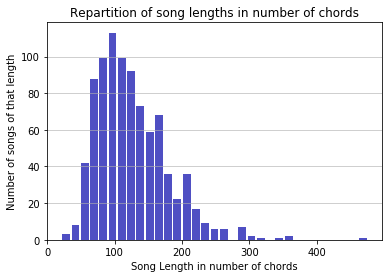

In [9]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Song Length in number of chords')
plt.ylabel('Number of songs of that length')
plt.title('Repartition of song lengths in number of chords')

**This plot represents the song lengths of our dataset in number of chords.**

**We see that most songs consists of a sequence of between 80 and 180 chords in total.**

In [10]:
root_notes = [all_data[i][1] for i in range(len(all_data))]

In [11]:
root_notes_index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
root_notes_count = np.zeros(7)
for note in root_notes:
    for i in range(7):
        if note==root_notes_index[i]:
            root_notes_count[i] += 1

Text(0.5, 1.0, 'Number of songs written in each root notes')

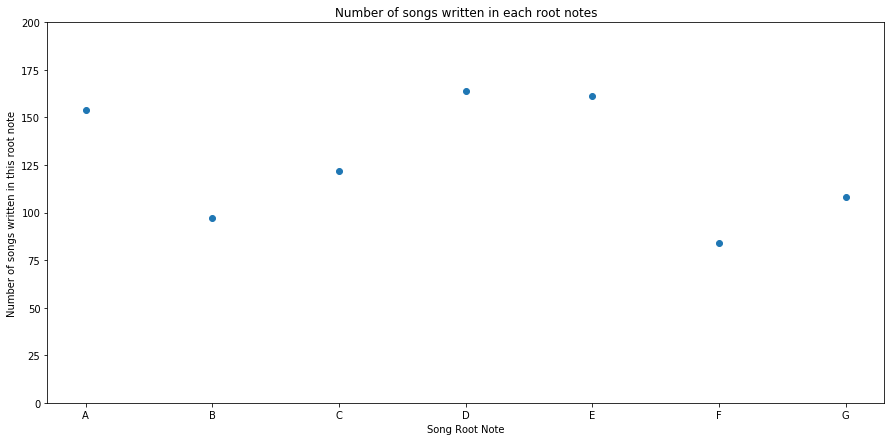

In [12]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

plt.scatter(range(7),root_notes_count)
plt.xticks(np.arange(7), ('A', 'B', 'C', 'D', 'E', 'F', 'G'))
plt.xlabel('Song Root Note')
plt.ylim(0, 200)
plt.ylabel('Number of songs written in this root note')
plt.title('Number of songs written in each root notes')

**We see that more songs are written in A, D or E than for the other root notes.**

**Note that the flat and sharp are linked to the related key in the dataset.**

In [13]:
first_chords = np.zeros(890)
second_chords = np.zeros(890)
third_chords = np.zeros(890)
for k in range(890):
    progression = all_data[k][2]
    collection = Counter(progression)
    
    most_common = collection.most_common(3)
    first_chords[k] = most_common[0][1]
    if len(most_common)>1:
        second_chords[k] = most_common[1][1]
    else:
        second_chords[k] = 0
    if len(most_common)>2:
        third_chords[k] = most_common[2][1]
    else:
        third_chords[k] = 0

Text(0.5, 1.0, 'Proportion of the most used chord in each song')

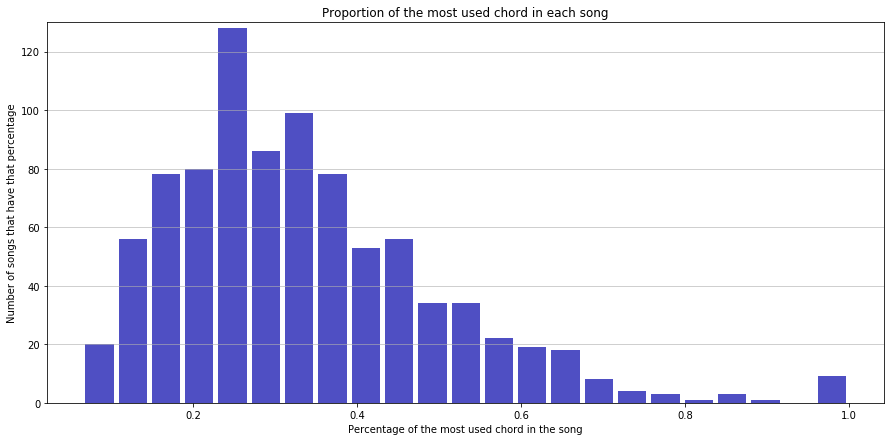

In [14]:
plt.figure()

plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=first_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 130)
plt.xlabel('Percentage of the most used chord in the song')
plt.ylabel('Number of songs that have that percentage')
plt.title('Proportion of the most used chord in each song')

In [15]:
print('Mean of the data for the first plot : ', np.round(100*np.mean(first_chords/song_len), 1))

Mean of the data for the first plot :  33.5


Text(0.5, 1.0, 'Proportion of the second most used chord in each song')

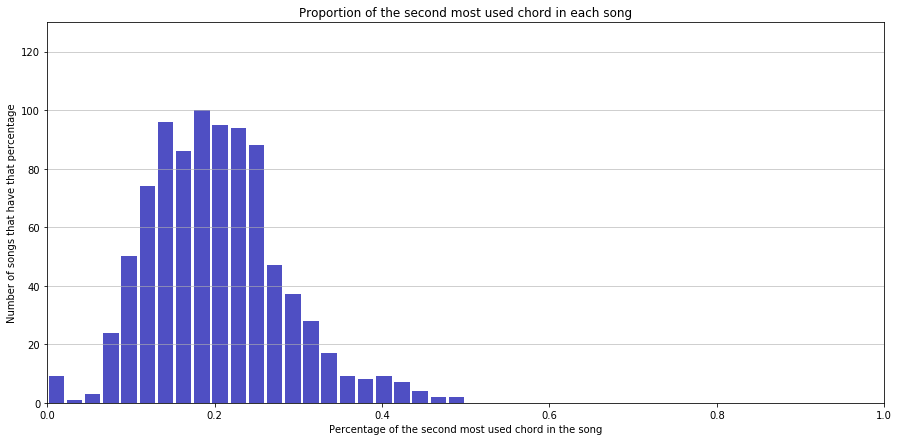

In [16]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=second_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.0,1.0)
plt.ylim(0, 130)
plt.xlabel('Percentage of the second most used chord in the song')
plt.ylabel('Number of songs that have that percentage')
plt.title('Proportion of the second most used chord in each song')

Text(0.5, 1.0, 'Proportion of the third most used chord in each song')

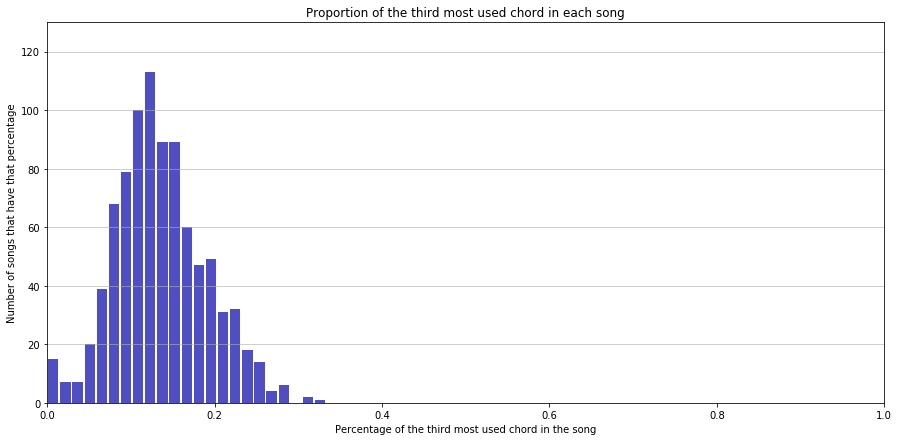

In [17]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=third_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.0, 1.0)
plt.ylim(0,130)
plt.xlabel('Percentage of the third most used chord in the song')
plt.ylabel('Number of songs that have that percentage')
plt.title('Proportion of the third most used chord in each song')

**Those three plots show the percentage the the three most used chords in a song occupy in those songs. We see for example that the most used song occupy in average 33.5% of each songs.**

**This could be a raw form of complexity of the songs as if a specific chord occupy most of the song, that leaves less space for diversity in the rest of the song.** 

In [18]:
all_chords = [list(set(all_data[k][2])) for k in range(890)]
all_chords = sum(all_chords, [])

counter_chords = Counter(all_chords)
counter_chords.most_common(10)

[('G:maj', 374),
 ('C:maj', 364),
 ('D:maj', 337),
 ('A:maj', 326),
 ('F:maj', 286),
 ('Bb:maj', 231),
 ('E:maj', 209),
 ('Eb:maj', 175),
 ('B:maj', 155),
 ('Ab:maj', 153)]

**Those are the 10 most used chords in songs, and the number of appearances for each chord.**